In [ ]:
import os

In [ ]:
os.chdir("/content")

#Data Download

In [ ]:
!wget 'https://ndownloader.figshare.com/articles/1512427/versions/5'

--2020-12-18 11:45:41--  https://ndownloader.figshare.com/articles/1512427/versions/5
Resolving ndownloader.figshare.com (ndownloader.figshare.com)... 3.248.117.254, 34.247.1.128, 34.247.231.218, ...
Connecting to ndownloader.figshare.com (ndownloader.figshare.com)|3.248.117.254|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 879501695 (839M) [application/zip]
Saving to: ‘5’

5                   100%[===================>] 838.76M  26.3MB/s    in 33s     

2020-12-18 11:46:14 (25.1 MB/s) - ‘5’ saved [879501695/879501695]



In [ ]:
!unzip '/content/drive/MyDrive/ACM/Brain-Tumor-Segmentation/data/5'

Archive:  /content/drive/MyDrive/ACM/Brain-Tumor-Segmentation/data/5
 extracting: brainTumorDataPublic_1-766.zip  
 extracting: brainTumorDataPublic_1533-2298.zip  
 extracting: brainTumorDataPublic_767-1532.zip  
 extracting: brainTumorDataPublic_2299-3064.zip  
 extracting: cvind.mat               
 extracting: README.txt              


##MAT to JPG

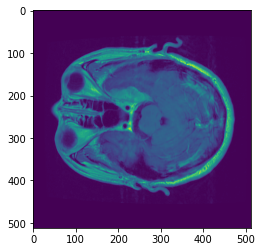

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
from PIL import Image

#reading v 7.3 mat file in python
#https://stackoverflow.com/questions/17316880/reading-v-7-3-mat-file-in-python

filepath = '/content/drive/MyDrive/ACM/Brain-Tumor-Segmentation/data/matFile/100.mat';
f = h5py.File(filepath, 'r') #Open mat file for reading

#In MATLAB the data is arranged as follows:
#cjdata is a MATLAB struct
#cjdata.image is a matrix of type int16

#Before update: read only image data.   
####################################################################
#Read cjdata struct, get image member and convert numpy ndarray of type float
#image = np.array(f['cjdata'].get('image')).astype(np.float64) #In MATLAB: image = cjdata.image
#f.close()
####################################################################

#Update: Read all elements of cjdata struct
####################################################################
#Read cjdata struct
cjdata = f['cjdata'] #<HDF5 group "/cjdata" (5 members)>

# In MATLAB cjdata = 
# struct with fields:
#   label: 1
#   PID: '100360'
#   image: [512×512 int16]
#   tumorBorder: [38×1 double]
#   tumorMask: [512×512 logical]

#get image member and convert numpy ndarray of type float
image = np.array(cjdata.get('image')).astype(np.float64) #In MATLAB: image = cjdata.image

label = cjdata.get('label')[0,0] #Use [0,0] indexing in order to convert lable to scalar

PID = cjdata.get('PID') # <HDF5 dataset "PID": shape (6, 1), type "<u2">
PID = ''.join(chr(c) for c in PID) #Convert to string https://stackoverflow.com/questions/12036304/loading-hdf5-matlab-strings-into-python

tumorBorder = np.array(cjdata.get('tumorBorder'))[0] #Use [0] indexing - convert from 2D array to 1D array.

tumorMask = np.array(cjdata.get('tumorMask'))

f.close()
####################################################################

#Convert image to uint8 (before saving as jpeg - jpeg doesn't support int16 format).
#Use simple linear conversion: subtract minimum, and divide by range.
#Note: the conversion is not optimal - you should find a better way.
#Multiply by 255 to set values in uint8 range [0, 255], and covert to type uint8.
hi = np.max(image)
lo = np.min(image)
image = (((image - lo)/(hi-lo))*255).astype(np.uint8)

#Save as jpeg
#https://stackoverflow.com/questions/902761/saving-a-numpy-array-as-an-image
im = Image.fromarray(image)
im.save("1.jpg")

#Display image for testing
imgplot = plt.imshow(image)
plt.show()

In [ ]:
# !git clone https://github.com/sdsubhajitdas/Brain-Tumor-Segmentation.git

In [ ]:
# !pip install -r requirements.txt

In [ ]:
!python api.py --file '/content/drive/MyDrive/ACM/Brain-Tumor-Segmentation/images/API/Original Image/3000.png' --odp '/content/drive/MyDrive/ACM/Brain-Tumor-Segmentation/images/output'

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import cv2

In [ ]:
img = plt.imread('/content/drive/MyDrive/ACM/Brain-Tumor-Segmentation/images/API/Original Image/3000_predicted.png')

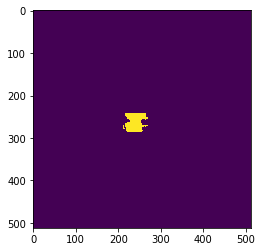

In [ ]:
plt.imshow(img)

##download_dataset.py

In [ ]:
import requests
from tqdm import tqdm
import os
import argparse


def check_if_file_exits(file):
    """ Checks if the file specified is downloaded or not.
    Parameters:
        file(str): Name of the file to be checked.
    Returns: None
    """
    extension = file[-3:]
    file = file[:-4] + '_done.'+extension
    return True if os.path.isfile(file) else False


def download_file(url, path):
    """ Download the file in url to the path specified.
    Parameters:
        url(str): URL of the file to be downloaded.
        path(str): Destination where the downloaded file will be saved.
    Returns: None
    """
    # Check if file already exists.
    if check_if_file_exits(path):
        print(f'Already existing file {path}')
        return

    # Deleting the partial downloaded file.
    if os.path.isfile(path):
        print(f'Deleted existing partial file {path}')
        os.remove(path)

    response = requests.get(url, stream=True)
    handle = open(path, "wb")
    with open(path, "wb") as handle:
        chunk_size = 1024
        total_size = round(int(response.headers['Content-Length']), 3)
        pbar = tqdm(unit="B", total=total_size)
        for chunk in response.iter_content(chunk_size=chunk_size):
            if chunk:  # filter out keep-alive new chunks
                handle.write(chunk)
                pbar.update(len(chunk))

    # Marking the file as downloaded.
    extension = path[-3:]
    os.rename(path, path[:-4]+'_done.'+extension)


def make_folder(target_folder):
    """Creates folder if there is no folder in the specified path.
    Parameters: 
        target_folder(str): path of the folder which needs to be created.
    Returns: None
    """
    if not (os.path.isdir(target_folder)):
        print(f'Creating {target_folder} folder')
        os.mkdir(target_folder)


def clear_screen():
    """Clears the console screen irrespective of os used"""
    import platform
    if platform.system() == 'Windows':
        os.system('cls')
        return
    os.system('clear')


def main():
    # URL of the dataset used.
    dataset_urls = ['https://ndownloader.figshare.com/files/3381290',
                    'https://ndownloader.figshare.com/files/3381296',
                    'https://ndownloader.figshare.com/files/3381293',
                    'https://ndownloader.figshare.com/files/3381302']

    # URL of dataset README
    dataset_readme = 'https://ndownloader.figshare.com/files/7953679'

    target_folder = 'dataset'
    dataset_part = 1
    dataset_file_name = f'brain_tumor_dataset_part_'

    clear_screen()
    make_folder(target_folder)

    print(f'\n\tDownloading dataset README.txt')
    download_file(dataset_readme, os.path.join(target_folder, 'README.TXT'))

    print('\n\tStarting download process\n')
    for url in dataset_urls:
        try:
            path = os.path.join(
                target_folder, f'{dataset_file_name}{dataset_part}.zip')
            print(f'\t\tDownloading :  {path}')
            download_file(url, path)
            dataset_part += 1
        except KeyboardInterrupt:
            print('\t\t\n\nDownload stopped')
            break


if __name__ == "__main__":
    main()

##extract_images.py

In [ ]:
import h5py
import numpy as np
import matplotlib.image as mpimg
from tqdm import tqdm
import os


def clear_screen():
    """Clears the console screen irrespective of os used"""
    import platform
    if platform.system() == 'Windows':
        os.system('cls')
        return
    os.system('clear')


def make_folder(target_folder):
    """Creates folder if there is no folder in the specified path.
    Parameters: 
        target_folder(str): path of the folder which needs to be created.
    Returns: None
    """
    if not (os.path.isdir(target_folder)):
        print(f'Creating {target_folder} folder')
        os.mkdir(target_folder)


def get_image_data(filename, path):
    """ Reads the mat image file and returns the image & mask array.
    Parameters:
        filename(str): Name of the file without the extension.
        path(str): Path where the filename is located.
    Returns:
        data(dict): A dictionary with the image & mask numpy array.
                    'image': The numpy array for image.
                    'mask' : The numpy array for the above image mask.
    """
    path = os.path.join(path, filename+'.mat')
    file = h5py.File(path, 'r')
    data = dict()
    data['image'] = np.array(file.get('cjdata/image'))
    data['mask'] = np.array(file.get('cjdata/tumorMask'))
    return data


def save_image_data(filename, path, data):
    """ Saves the image & mask array in png format.
    Parameters:
        filename(str): Name of the file without the extension.
        path(str): Path where the filename is to be saved.
        data(dict): A dictionary with the image & mask numpy array.
                    'image': The numpy array for image.
                    'mask' : The numpy array for the above image mask.
    Returns: None
    """
    path_image = os.path.join(path, filename+'.png')
    path_mask = os.path.join(path, filename+'_mask.png')
    mpimg.imsave(path_image, data['image'], cmap='gray', format='png')
    mpimg.imsave(path_mask, data['mask'], cmap='gray', format='png')


def main():
    # Total number of images
    total_images = 3064

    # Dataset paths
    data_read_path = os.path.join('dataset', 'mat_dataset')
    data_save_path = os.path.join('dataset', 'png_dataset')

    clear_screen()

    # Make if folder is missing.
    make_folder(data_save_path)

    print(f'Starting to save images in {data_save_path}')

    for filename in tqdm(range(1, total_images+1)):
        filename = str(filename)
        data = get_image_data(filename, data_read_path)
        save_image_data(str(int(filename)-1), data_save_path, data)


if __name__ == "__main__":
    main()

  0%|          | 1/3064 [00:00<07:21,  6.94it/s]

Starting to save images in dataset/png_dataset


100%|██████████| 3064/3064 [06:25<00:00,  7.95it/s]


##unzip_dataset.py

In [ ]:

from zipfile import ZipFile
import os


def clear_screen():
    """Clears the console screen irrespective of os used"""
    import platform
    if platform.system() == 'Windows':
        os.system('cls')
        return
    os.system('clear')


def unzip_file(source_name, destination):
    """ Unizips a zip file and stores the contents in destination folder.
    Parameters:
        source_name(str): Full path of the source path
        destination(str): Full folder path where contents of source_name will be stored.
    Returns: None
    """
    with ZipFile(source_name, 'r') as zipfile:
        # extracting all the files
        print(f'\tExtracting files of {source_name}')
        zipfile.extractall(destination)
        print(f'\tDone with {source_name}')


def make_folder(target_folder):
    """Creates folder if there is no folder in the specified path.
    Parameters: 
        target_folder(str): path of the folder which needs to be created.
    Returns: None
    """
    if not (os.path.isdir(target_folder)):
        print(f'Creating {target_folder} folder')
        os.mkdir(target_folder)


def main():
    # Clears the screen.
    clear_screen()

    # File names in a list.
    file_names = [
        f'brain_tumor_dataset_part_{i}_done.zip' for i in range(1, 5)]

    # Destination folder to store files.
    destination = os.path.join('dataset', 'mat_dataset')
    # Make the destination folder.
    make_folder(os.path.join('dataset', 'mat_dataset'))

    for file in file_names:
        path = os.path.join('dataset', file)
        unzip_file(path, destination)


if __name__ == "__main__":
    main()

Creating dataset/mat_dataset folder
	Extracting files of dataset/brain_tumor_dataset_part_1_done.zip
	Done with dataset/brain_tumor_dataset_part_1_done.zip
	Extracting files of dataset/brain_tumor_dataset_part_2_done.zip
	Done with dataset/brain_tumor_dataset_part_2_done.zip
	Extracting files of dataset/brain_tumor_dataset_part_3_done.zip
	Done with dataset/brain_tumor_dataset_part_3_done.zip
	Extracting files of dataset/brain_tumor_dataset_part_4_done.zip
	Done with dataset/brain_tumor_dataset_part_4_done.zip


In [ ]:
!git clone 'https://github.com/sdsubhajitdas/Brain-Tumor-Segmentation.git'

Cloning into 'Brain-Tumor-Segmentation'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 440 (delta 11), reused 4 (delta 2), pack-reused 416
Receiving objects: 100% (440/440), 37.96 MiB | 3.89 MiB/s, done.
Resolving deltas: 100% (128/128), done.


In [ ]:
os.chdir('/content/Brain-Tumor-Segmentation')

In [ ]:
from tensorboardX import SummaryWriter

ModuleNotFoundError: ignored

#Dependencies

In [ ]:
import os
import warnings
import pickle
warnings.filterwarnings('ignore')

import torch
from torch.utils.data import SubsetRandomSampler

import numpy as np
%matplotlib inline

import bts.dataset as dataset
import bts.model as model
import bts.classifier as classifier
import bts.plot as plot

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print('Computation Details')
print(f'\tDevice Used: ({device})  {torch.cuda.get_device_name(torch.cuda.current_device())}\n')

print('Packages Used Versions:-')
print(f'\tPytorch Version: {torch.__version__}')

# To Start TensorBoard
# tensorboard --logdir logs --samples_per_plugin images=200

Computation Details
	Device Used: (cuda)  Tesla P100-PCIE-16GB

Packages Used Versions:-
	Pytorch Version: 1.7.0+cu101


##Hyperparamters

In [ ]:
# Dataset part used for testing
TEST_SPLIT = 0.2
# Batch size for training. Limited by GPU memory
BATCH_SIZE = 6
# Dataset folder used
DATASET_USED = 'png_dataset'
# Full Dataset path
DATASET_PATH = os.path.join('/content/dataset',DATASET_USED)
# Training Epochs
EPOCHS = 100
# Filters used in UNet Model
FILTER_LIST = [16,32,64,128,256]
# Flag to train the model
TRAIN = False
# Flag to load saved model
LOAD_MODEL = True
# Flag to save model trained
SAVE_MODEL = False
# Model name to save or load.
MODEL_NAME = f"UNet-{FILTER_LIST}.pt"

print(f"Model Name :   {MODEL_NAME}")

Model Name :   UNet-[16, 32, 64, 128, 256].pt


In [ ]:
def get_indices(length, new=False):
    """ Gets the Training & Testing data indices for a
    paticular "DATASET_USED".Stores the indices and returns
    them back when the same dataset is used.
    Parameters:
        length(int): Length of the dataset used.
        new(bool): Discard the saved indices and get new ones.
    Return:
        train_indices(list): Array of indices used for training purpose.
        test_indices(list): Array of indices used for testing purpose.
    """
    # Pickle file location of the indices.
    file_path = os.path.join('dataset',f'split_indices_{DATASET_USED}.p')
    data = dict()
    if os.path.isfile(file_path) and not new:
        # File found.
        with open(file_path,'rb') as file :
            data = pickle.load(file)
            return data['train_indices'], data['test_indices']
    else:
        # File not found or fresh copy is required.
        indices = list(range(length))
        np.random.shuffle(indices)
        split = int(np.floor(TEST_SPLIT * len(tumor_dataset)))
        train_indices , test_indices = indices[split:], indices[:split]
        # Indices are saved with pickle.
        data['train_indices'] = train_indices
        data['test_indices'] = test_indices
        with open(file_path,'wb') as file:
            pickle.dump(data,file)
    return train_indices, test_indices

##Data Loader

In [ ]:
tumor_dataset = dataset.TumorDataset(DATASET_PATH)

train_indices, test_indices = get_indices(len(tumor_dataset))
train_sampler, test_sampler = SubsetRandomSampler(train_indices), SubsetRandomSampler(test_indices)

trainloader = torch.utils.data.DataLoader(tumor_dataset, BATCH_SIZE, sampler=train_sampler)
testloader = torch.utils.data.DataLoader(tumor_dataset, 1, sampler=test_sampler)

##Load Model

In [ ]:
unet_model = None
unet_classifier = None
if not LOAD_MODEL:
    # New model is created.
    unet_model = model.DynamicUNet(FILTER_LIST).to(device)
    unet_classifier = classifier.BrainTumorClassifier(unet_model,device)
else:
    # Saved model is loaded on memory.
    unet_model = model.DynamicUNet(FILTER_LIST)
    unet_classifier = classifier.BrainTumorClassifier(unet_model,device)
    unet_classifier.restore_model(os.path.join('saved_models',MODEL_NAME))
    print('Saved model loaded')

Saved model loaded


##Trainer

In [ ]:
# Training process
if TRAIN:
    unet_model.train()
    path = os.path.join('saved_models',MODEL_NAME) if SAVE_MODEL else None
    unet_train_history = unet_classifier.train(EPOCHS,trainloader,mini_batch=100,save_best=path)
    print(f'Training Finished after {EPOCHS} epoches')

# Testing process on test data.
unet_model.eval()
unet_score = unet_classifier.test(testloader)
print(f'\n\nDice Score {unet_score}')
# Dice Score 0.7446110107881675

In [ ]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
img = cv2.imread('/content/dataset/png_dataset/0.png')

In [ ]:
mask = cv2.imread('/content/dataset/png_dataset/0_mask.png')

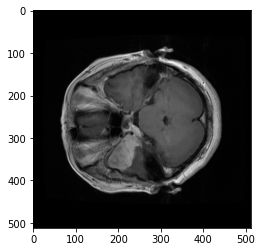

In [ ]:
plt.imshow(img)

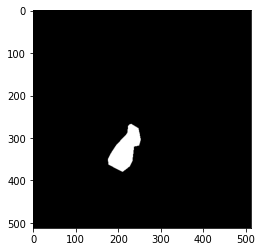

In [ ]:
plt.imshow(mask)

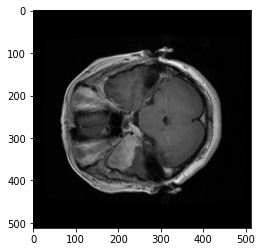

In [ ]:
plt.imshow(img1)